In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cell_samples.csv')

In [30]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [31]:
df.shape

(699, 11)

In [32]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [34]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [35]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [44]:
benign_df = df[df['Class']==2][:200]
malignant_df = df[df['Class']==4][:200]

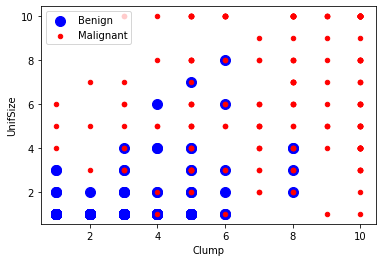

In [45]:
axes = benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign',s=100)
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant', ax=axes)

In [46]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Because 'BareNuc' column is object type we are converting it to numerica nd the value which cannot be converted to numeric will be represented as NaN. We will filter those NaNs using nonull() method.

In [50]:
df = df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]

In [51]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [52]:
df['BareNuc'] = df['BareNuc'].astype('int')

In [53]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [54]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [55]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [60]:
# Independent var
X = np.asarray(feature_df)

In [61]:
# Dependent var
y= np.asarray(df['Class'])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [64]:
X_train.shape

(546, 9)

In [65]:
from sklearn import svm

In [67]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)

In [68]:
classifier.fit(X_train, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
y_predict = classifier.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.69      0.94      0.79        90
           4       0.62      0.17      0.27        47

    accuracy                           0.68       137
   macro avg       0.65      0.56      0.53       137
weighted avg       0.66      0.68      0.61       137

